In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [8]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

**MLP + ReLU + ADAM + 2 layer (416 52)**

In [0]:
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.069  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.196  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)
model_relu = Sequential()
model_relu.add(Dense(416, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.069, seed=None)))
model_relu.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.196, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 416)               326560    
_________________________________________________________________
dense_8 (Dense)              (None, 52)                21684     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                530       
Total params: 348,774
Trainable params: 348,774
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.2664 - acc: 0.9207 - val_loss: 0.1326 - val_acc: 0.9613
Epoch 2/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0979 - acc: 0.9710 - val_loss: 0.0930 - val_acc: 0.9704
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.09864431598463588
Test accuracy: 0.9805


<IPython.core.display.Javascript object>

In [0]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png

-rw-r--r-- 1 root root 19K Jul 17 13:34 my_figure.png


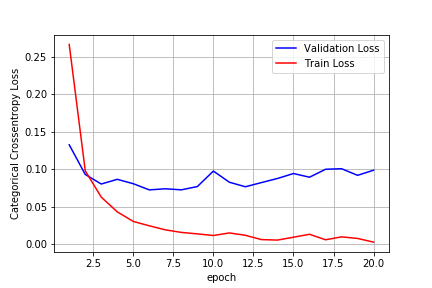

In [0]:
from IPython.display import Image
Image('my_figure.png')

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

-rw-r--r-- 1 root root 25K Jul 17 13:34 my_figure.png


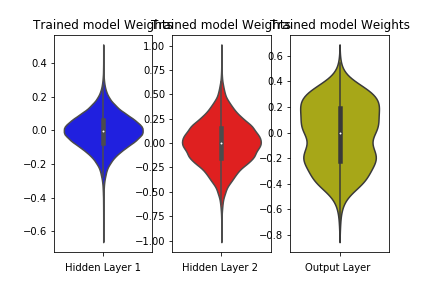

In [0]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png
from IPython.display import Image
Image('my_figure.png')

Dis: MLP with 2 hidden layer, layer one with fanin 416 and layer 2 with with fan in 52. ReLu activation function. model give 0.9805 accuracy.

**MLP + Batch-Norm on hidden Layers + AdamOptimizer**

In [0]:

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(416, activation='relu', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(52, activation='relu', kernel_initializer='he_uniform') )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 416)               326560    
_________________________________________________________________
batch_normalization_1 (Batch (None, 416)               1664      
_________________________________________________________________
dense_11 (Dense)             (None, 52)                21684     
_________________________________________________________________
batch_normalization_2 (Batch (None, 52)                208       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                530       
Total params: 350,646
Trainable params: 349,710
Non-trainable params: 936
_________________________________________________________________


In [0]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.2189 - acc: 0.9380 - val_loss: 0.1122 - val_acc: 0.9675
Epoch 2/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0798 - acc: 0.9763 - val_loss: 0.0985 - val_acc: 0.9695
Epoch 3/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0503 - acc: 0.9846 - val_loss: 0.0877 - val_acc: 0.9734
Epoch 4/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0363 - acc: 0.9886 - val_loss: 0.0894 - val_acc: 0.9734
Epoch 5/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0274 - acc: 0.9916 - val_loss: 0.0769 - val_acc: 0.9778
Epoch 6/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0217 - acc: 0.9931 - val_loss: 0.0749 - val_acc: 0.9773
Epoch 7/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0204 - acc: 0.9932 - val_loss: 0.0806 - 

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.07768398683070336
Test accuracy: 0.9818


<IPython.core.display.Javascript object>

-rw-r--r-- 1 root root 18K Jul 17 13:51 my_figure.png


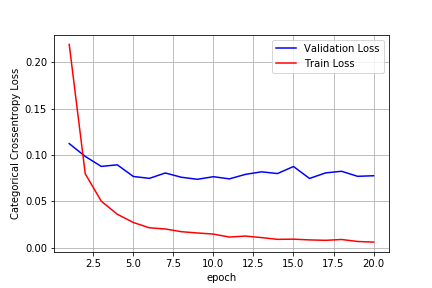

In [0]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png
from IPython.display import Image
Image('my_figure.png')

In [0]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

-rw-r--r-- 1 root root 24K Jul 17 13:52 my_figure.png


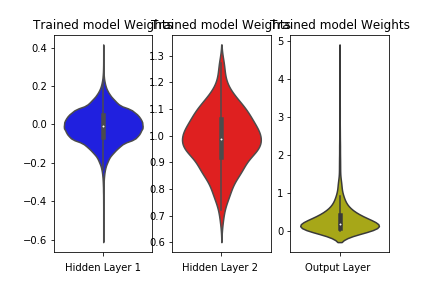

In [0]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png
from IPython.display import Image
Image('my_figure.png')

Dis: MLP with 2 hidden layer, layer one with fanin 416 and layer 2 with with fan in 52. ReLu activation function with batch Norm and Adam optimizer. model give 0.9818 accuracy.

**MLP + Dropout + AdamOptimizer**

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total para

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.4358 - acc: 0.8679 - val_loss: 0.1392 - val_acc: 0.9580
Epoch 2/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.2053 - acc: 0.9383 - val_loss: 0.1062 - val_acc: 0.9674
Epoch 3/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.1614 - acc: 0.9515 - val_loss: 0.0897 - val_acc: 0.9719
Epoch 4/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.1324 - acc: 0.9597 - val_loss: 0.0785 - val_acc: 0.9743
Epoch 5/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.1201 - acc: 0.9632 - val_loss: 0.0759 - val_acc: 0.9758
Epoch 6/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.1086 - acc: 0.9671 - val_loss: 0.0716 - val_acc: 0.9775
Epoch 7/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0999 - acc: 0.9690 - val_loss: 0.0657 -

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.05687170704120072
Test accuracy: 0.9833


<IPython.core.display.Javascript object>

-rw-r--r-- 1 root root 19K Jul 17 14:12 my_figure.png


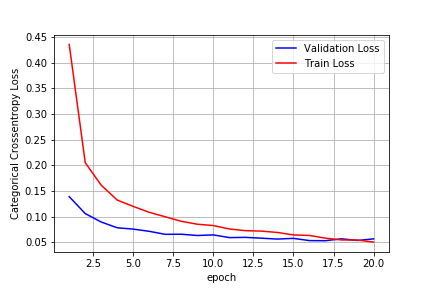

In [0]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png
from IPython.display import Image
Image('my_figure.png')

In [0]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

-rw-r--r-- 1 root root 24K Jul 17 14:14 my_figure.png


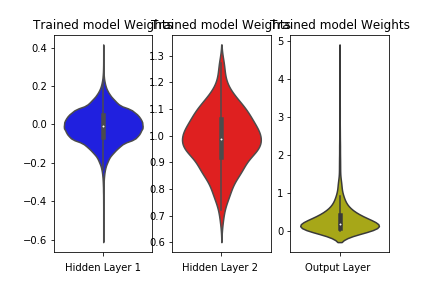

In [0]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png
from IPython.display import Image
Image('my_figure.png')

Dis: MLP with 2 hidden layer, layer one with fanin 416 and layer 2 with with fan in 52. ReLu activation function with batch Norm and dropout and Adam optimizer. model give 0.9833 accuracy.

**MLP + ReLU + ADAM + layer 3**

In [0]:
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.069  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.196  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_relu.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_relu.add(Dense(64, activation='relu', kernel_initializer='he_uniform') )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total params: 476,490
Trainable params: 476,490
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.2428 - acc: 0.9284 - val_loss: 0.1162 - val_acc: 0.9633
Epoch 2/20
60000/60000 [==============================] - 7s 120us/step - l

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.10570686743954388
Test accuracy: 0.9794


<IPython.core.display.Javascript object>

-rw-r--r-- 1 root root 18K Jul 17 15:31 my_figure.png


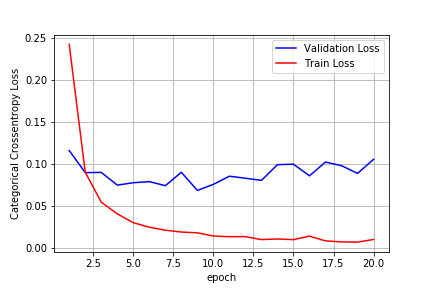

In [0]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png
from IPython.display import Image
Image('my_figure.png')

Dis: MLP with 3 hidden layer, layer one with fanin 512 and layer 2 with with fan in 128, layer 3 with fanin 64. ReLu activation function and Adam optimizer. model give 0.9794 accuracy.

**MLP + ReLU + ADAM + layer 3 +AdamOptimizer**

In [0]:
from keras.layers.normalization import BatchNormalization
model_batch.add(BatchNormalization())

model_batch = Sequential()
model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())
model_batch.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())
model_batch.add(Dense(64, activation='relu', kernel_initializer='he_uniform') )
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dense_28 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_13 (Batc (None, 64)                256       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total para

In [0]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.2093 - acc: 0.9389 - val_loss: 0.1053 - val_acc: 0.9672
Epoch 2/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0767 - acc: 0.9767 - val_loss: 0.0893 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0511 - acc: 0.9840 - val_loss: 0.0752 - val_acc: 0.9741
Epoch 4/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0346 - acc: 0.9894 - val_loss: 0.0790 - val_acc: 0.9757
Epoch 5/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0316 - acc: 0.9901 - val_loss: 0.0799 - val_acc: 0.9768
Epoch 6/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0233 - acc: 0.9929 - val_loss: 0.0704 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0232 - acc: 0.9925 - val_loss: 0.0755 -

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.09798150691569463
Test accuracy: 0.9768


<IPython.core.display.Javascript object>

-rw-r--r-- 1 root root 21K Jul 17 17:28 my_figure.png


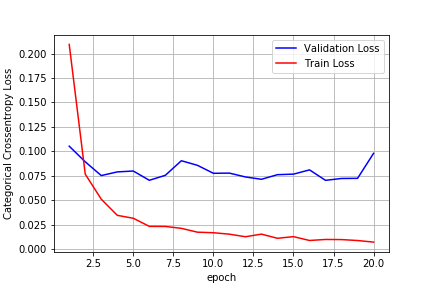

In [0]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png
from IPython.display import Image
Image('my_figure.png')

Dis: MLP with 3 hidden layer, layer one with fanin 512 and layer 2 with with fan in 128, layer 3 with fanin 64. ReLu activation function with batch Norm and Adam optimizer. model give 0.9768 accuracy.

**MLP + 3 layer+  Dropout + AdamOptimizer**

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer='he_uniform') )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
__________

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.7056 - acc: 0.7876 - val_loss: 0.1868 - val_acc: 0.9440
Epoch 2/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.2978 - acc: 0.9165 - val_loss: 0.1326 - val_acc: 0.9601
Epoch 3/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.2236 - acc: 0.9367 - val_loss: 0.1092 - val_acc: 0.9675
Epoch 4/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.1882 - acc: 0.9470 - val_loss: 0.1010 - val_acc: 0.9700
Epoch 5/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1658 - acc: 0.9537 - val_loss: 0.0925 - val_acc: 0.9733
Epoch 6/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.1508 - acc: 0.9581 - val_loss: 0.0803 - val_acc: 0.9765
Epoch 7/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1372 - acc: 0.9613 - val_loss: 0.0832 -

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.06220710538331187
Test accuracy: 0.9835


<IPython.core.display.Javascript object>

-rw-r--r-- 1 root root 17K Jul 17 17:34 my_figure.png


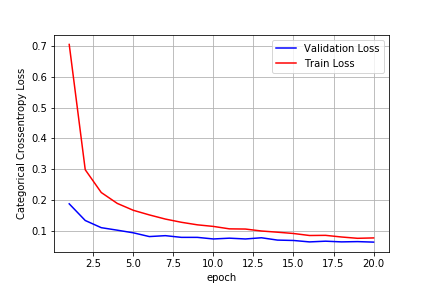

In [0]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png
from IPython.display import Image
Image('my_figure.png')

Dis: MLP with 3 hidden layer, layer one with fanin 512 and layer 2 with with fan in 128, layer 3 with fanin 64. ReLu activation function with batch Norm and dropout and Adam optimizer. model give 0.9735 accuracy.

**MLP + ReLU + ADAM + layer 5**

In [11]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_relu.add(Dense(384, activation='relu', kernel_initializer='he_uniform'))
model_relu.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_relu.add(Dense(128, activation='relu', kernel_initializer='he_uniform') )
model_relu.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0720 09:15:58.203392 140501444282240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 09:15:58.247846 140501444282240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 09:15:58.258066 140501444282240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 09:15:58.350034 140501444282240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0720 09:15:58.380863 140501444282240 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 384)               196992    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               98560     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 739,274
Trainable params: 739,274
Non-trainable params: 0
_________________________________________________________________
None

W0720 09:15:58.587624 140501444282240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.2349 - acc: 0.9291 - val_loss: 0.1144 - val_acc: 0.9627
Epoch 2/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0895 - acc: 0.9724 - val_loss: 0.0929 - val_acc: 0.9716
Epoch 3/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0596 - acc: 0.9812 - val_loss: 0.1106 - val_acc: 0.9643
Epoch 4/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0475 - acc: 0.9847 - val_loss: 0.0728 - val_acc: 0.9779
Epoch 5/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0393 - acc: 0.9872 - val_loss: 0.0859 - val_acc: 0.9765
Epoch 6/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0335 - acc: 0.9892 - val_loss: 0.0907 - val_acc: 0.9760
Epoch 7/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0272 - acc: 0.9918 - val_loss: 0.0726 -

In [12]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.08897935750352176
Test accuracy: 0.9837


<IPython.core.display.Javascript object>

-rw-r--r-- 1 root root 19K Jul 20 09:19 my_figure.png


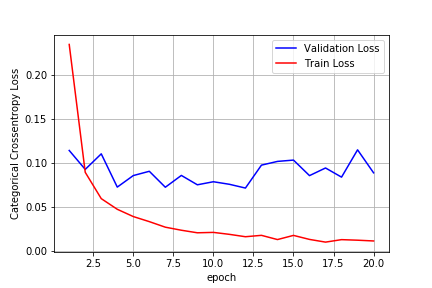

In [13]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png
from IPython.display import Image
Image('my_figure.png')

Dis: MLP with 3 hidden layer, layer one with fanin 512 and layer 2 with with fan in 384, layer 3 with fanin 256, layer 4 with fanin 128, layer 5 with fanin 64 . ReLu activation function  and Adam optimizer. model give 0.9837 accuracy.

**MLP + 5 layer+ AdamOptimizer**

In [15]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(384, activation='relu', kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())


model_batch.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())


model_batch.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())


model_batch.add(Dense(64, activation='relu', kernel_initializer='he_uniform') )
model_batch.add(BatchNormalization())


model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_9 (Dense)              (None, 384)               196992    
_________________________________________________________________
batch_normalization_2 (Batch (None, 384)               1536      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               98560     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
__________

In [16]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.07432117228349525
Test accuracy: 0.982


<IPython.core.display.Javascript object>

-rw-r--r-- 1 root root 18K Jul 20 09:28 my_figure.png


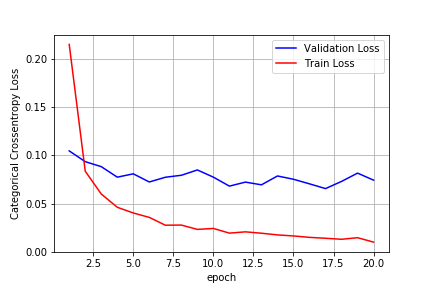

In [17]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png
from IPython.display import Image
Image('my_figure.png')

Dis: MLP with 3 hidden layer, layer one with fanin 512 and layer 2 with with fan in 384, layer 3 with fanin 256, layer 4 with fanin 128, layer 5 with fanin 64 . ReLu activation function with batch Norm and Adam optimizer. model give 0.982 accuracy.


**MLP + 5 layer+  Dropout + AdamOptimizer**

In [18]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(384, activation='relu', kernel_initializer='he_uniform'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer='he_uniform') )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0720 09:28:34.095082 140501444282240 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 384)               196992    
_________________________________________________________________
batch_normalization_7 (Batch (None, 384)               1536      
_________________________________________________________________
dropout_2 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               98560     
__________

In [19]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.07510444251685404
Test accuracy: 0.9805


<IPython.core.display.Javascript object>

-rw-r--r-- 1 root root 16K Jul 20 09:35 my_figure.png


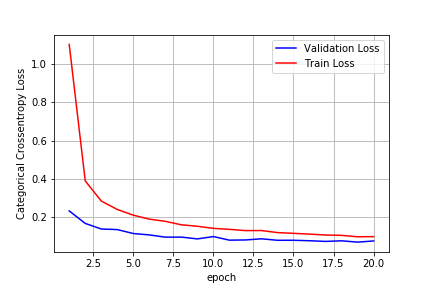

In [20]:
fig.savefig('my_figure.png')
!ls -lh my_figure.png
from IPython.display import Image
Image('my_figure.png')

Dis: MLP with 3 hidden layer, layer one with fanin 512 and layer 2 with with fan in 384, layer 3 with fanin 256, layer 4 with fanin 128, layer 5 with fanin 64 . ReLu activation function with batch Norm and dropout and Adam optimizer. model give 0.9805 accuracy.

In [22]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = [ "Model", "BN", "dropout", "ACCURACY"]

x.add_row(["Layer 2", 0, 0, 0.9805])
x.add_row(["Layer 2", 1, 0, 0.9818])
x.add_row(["Layer 2", 1, 1, 0.9833])
x.add_row(["Layer 3", 0, 0, 0.9774])
x.add_row(["Layer 3", 1, 0, 0.9768])
x.add_row(["Layer 3", 1, 1, 0.9837])
x.add_row(["Layer 5", 0, 0, 0.9837])
x.add_row(["Layer 5", 1, 0, 0.9820])
x.add_row(["Layer 5", 1, 1, 0.9805])

print(x)

+---------+----+---------+----------+
|  Model  | BN | dropout | ACCURACY |
+---------+----+---------+----------+
| Layer 2 | 0  |    0    |  0.9805  |
| Layer 2 | 1  |    0    |  0.9818  |
| Layer 2 | 1  |    1    |  0.9833  |
| Layer 3 | 0  |    0    |  0.9774  |
| Layer 3 | 1  |    0    |  0.9768  |
| Layer 3 | 1  |    1    |  0.9837  |
| Layer 5 | 0  |    0    |  0.9837  |
| Layer 5 | 1  |    0    |  0.982   |
| Layer 5 | 1  |    1    |  0.9805  |
+---------+----+---------+----------+
